# Research Question
<font color= 'red' size='4'>How does the pattern of international tourist arrivals vary across different countries in India over the past decade. Specifically in Covid, what are the trends in tourist numbers, and are there any notable variations in growth rates?</font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Country Wise Yearly VIsitors.csv')
print('data successfully read into pandas dataframe')

data successfully read into pandas dataframe


In [8]:
print(f'There are total {df.shape[0]} rows and {df.shape[1]} columns in data')
df.head()

There are total 63 rows and 8 columns in data


,Country,2014,2015,2016,2017,2018,2019,2020
0,Canada,268485,281306,317239,335439,351040,351859,122868
1,U.S.A,1118983,1213624,1296939,1376919,1456678,1512032,394092
2,Argentina,9731,9351,12308,14875,16345,12844,4294
3,Brazil,19563,20610,21289,24453,26579,25422,8092
4,Mexico,13978,14049,15689,18114,19909,20766,4580


In [11]:
df = df.sort_values(by='2019', ascending=False)
top_15_countries = df.head(15).reset_index(drop=True)

top_15_countries

,Country,2014,2015,2016,2017,2018,2019,2020
0,Bangladesh,942562,1133879,1380409,2156557,2256675,2577727,549273
1,U.S.A,1118983,1213624,1296939,1376919,1456678,1512032,394092
2,U.K.,838860,867601,941883,986296,1029757,1000292,291874
3,Australia,239762,263201,293625,324243,346486,367241,86758
4,Canada,268485,281306,317239,335439,351040,351859,122868
5,China,181020,206322,251313,247235,281768,339442,39586
6,Malaysia,262026,272941,301961,322126,319172,334579,69897
7,Sri Lanka,301601,299513,297418,303590,353684,330861,68646
8,Germany,239106,248314,265928,269380,274087,264973,72558
9,Russian Fed,269832,172419,227749,278904,262309,251319,102166


In [12]:
others_countries = pd.DataFrame(df.iloc[15:].sum()).transpose()
others_countries['Country'] = 'Others'

others_countries

,Country,2014,2015,2016,2017,2018,2019,2020
0,Others,1899479,1939474,2039960,2155166,2255663,2236856,604189


In [13]:
df = pd.concat([top_15_countries, others_countries], ignore_index=True)
df

,Country,2014,2015,2016,2017,2018,2019,2020
0,Bangladesh,942562,1133879,1380409,2156557,2256675,2577727,549273
1,U.S.A,1118983,1213624,1296939,1376919,1456678,1512032,394092
2,U.K.,838860,867601,941883,986296,1029757,1000292,291874
3,Australia,239762,263201,293625,324243,346486,367241,86758
4,Canada,268485,281306,317239,335439,351040,351859,122868
5,China,181020,206322,251313,247235,281768,339442,39586
6,Malaysia,262026,272941,301961,322126,319172,334579,69897
7,Sri Lanka,301601,299513,297418,303590,353684,330861,68646
8,Germany,239106,248314,265928,269380,274087,264973,72558
9,Russian Fed,269832,172419,227749,278904,262309,251319,102166


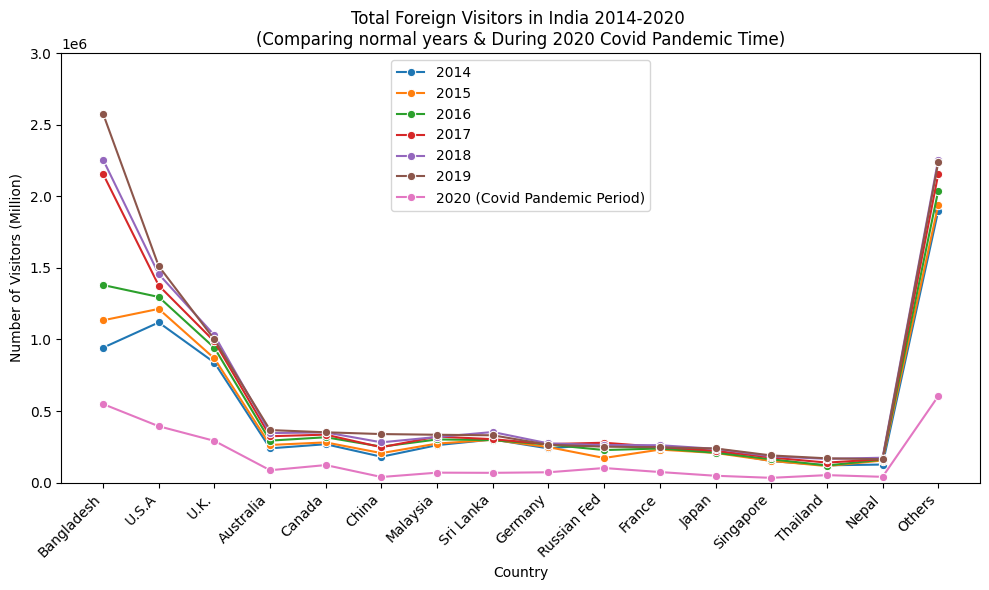

In [14]:
plt.figure(figsize=(10, 6)) 

sns.lineplot(x='Country', y='2014', data=df, marker='o', label='2014')
sns.lineplot(x='Country', y='2015', data=df, marker='o', label='2015')
sns.lineplot(x='Country', y='2016', data=df, marker='o', label='2016')
sns.lineplot(x='Country', y='2017', data=df, marker='o', label='2017')
sns.lineplot(x='Country', y='2018', data=df, marker='o', label='2018')
sns.lineplot(x='Country', y='2019', data=df, marker='o', label='2019')
sns.lineplot(x='Country', y='2020', data=df, marker='o', label='2020 (Covid Pandemic Period)')

plt.xlabel('Country')
plt.ylabel('Number of Visitors (Million)')
plt.title('Total Foreign Visitors in India 2014-2020 \n(Comparing normal years & During 2020 Covid Pandemic Time)')

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.ylim(0, 3_000_000)
plt.legend()
plt.tight_layout()

In [16]:
df = df[['Country', '2018', '2019', '2020']]
df = df.sort_values(by='2019', ascending=False)

top_15_countries = df.head(15)
others_countries = pd.DataFrame(df.iloc[15:].sum()).transpose()
others_countries['Country'] = 'Others'

df = pd.concat([top_15_countries, others_countries], ignore_index=True)
df

,Country,2018,2019,2020
0,Bangladesh,2256675,2577727,549273
1,Others,2255663,2236856,604189
2,U.S.A,1456678,1512032,394092
3,U.K.,1029757,1000292,291874
4,Australia,346486,367241,86758
5,Canada,351040,351859,122868
6,China,281768,339442,39586
7,Malaysia,319172,334579,69897
8,Sri Lanka,353684,330861,68646
9,Germany,274087,264973,72558


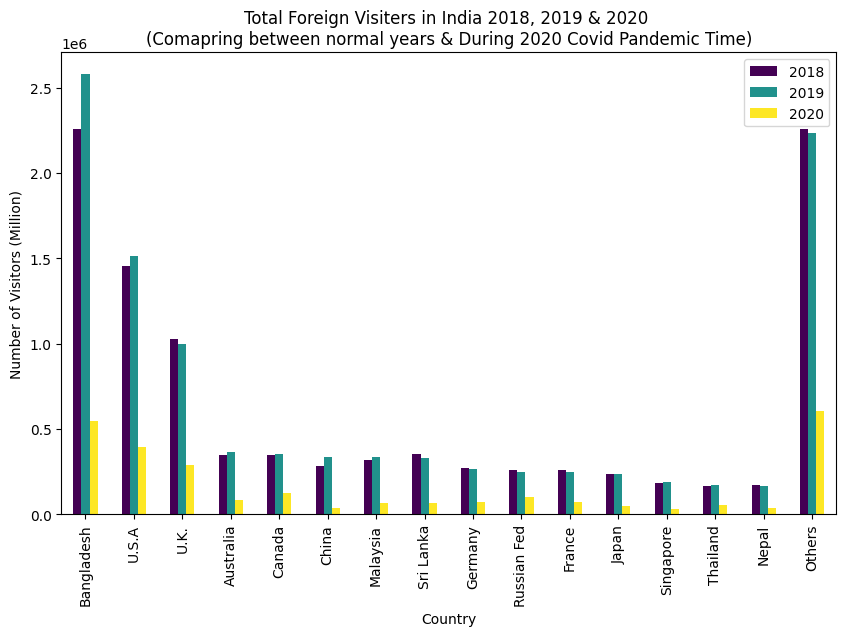

In [101]:
df.plot(x='Country', y=['2018', '2019', '2020'], kind='bar', figsize=(10, 6), colormap='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Visitors (Million)')
plt.title('Total Foreign Visiters in India 2018, 2019 & 2020 \n(Comapring between normal years & During 2020 Covid Pandemic Time)');

### Thank you
## Author

[Neelesh Chidar](https://www.linkedin.com/in/neeleshchidar37/)